## import the  libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the dataset

In [2]:
data=pd.read_csv("HousePricePrediction.csv")
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [5]:
data.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


## get the information and describe the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [7]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


## matrix form for correlation data.

In [85]:
corr=data.corr()

In [86]:
corr

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,0.012932,-0.040746,0.033606,0.006659,-0.002839,-0.016581,-0.050438,-0.019529,0.018249,-0.024922,-0.024942
MSSubClass,0.008931,1.000000,0.027386,-0.201730,0.073151,0.741508,-0.065625,0.034409,0.043315,-0.111893,-0.072520,-0.219936,-0.093437
MSZoning,0.012932,0.027386,1.000000,-0.034284,0.018972,-0.026731,0.182504,-0.311800,-0.191691,-0.052160,0.011103,-0.108340,-0.203964
LotArea,-0.040746,-0.201730,-0.034284,1.000000,-0.117687,-0.257673,-0.035617,0.024128,0.021612,0.013794,0.084055,0.254125,0.228694
LotConfig,0.033606,0.073151,0.018972,-0.117687,1.000000,0.106852,-0.020920,0.016909,0.004977,0.004691,-0.007980,-0.039147,-0.038866
BldgType,0.006659,0.741508,-0.026731,-0.257673,0.106852,1.000000,-0.148081,0.217971,0.110448,-0.128505,-0.026036,-0.017009,-0.029690
OverallCond,-0.002839,-0.065625,0.182504,-0.035617,-0.020920,-0.148081,1.000000,-0.368477,0.047654,-0.000160,0.041489,-0.173952,-0.109314
YearBuilt,-0.016581,0.034409,-0.311800,0.024128,0.016909,0.217971,-0.368477,1.000000,0.612235,0.103224,-0.027591,0.408466,0.634509
YearRemodAdd,-0.050438,0.043315,-0.191691,0.021612,0.004977,0.110448,0.047654,0.612235,1.000000,0.229767,-0.062125,0.297969,0.624526
Exterior1st,-0.019529,-0.111893,-0.052160,0.013794,0.004691,-0.128505,-0.000160,0.103224,0.229767,1.000000,-0.065413,0.032338,0.124926


## Data visualization

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maniteja\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


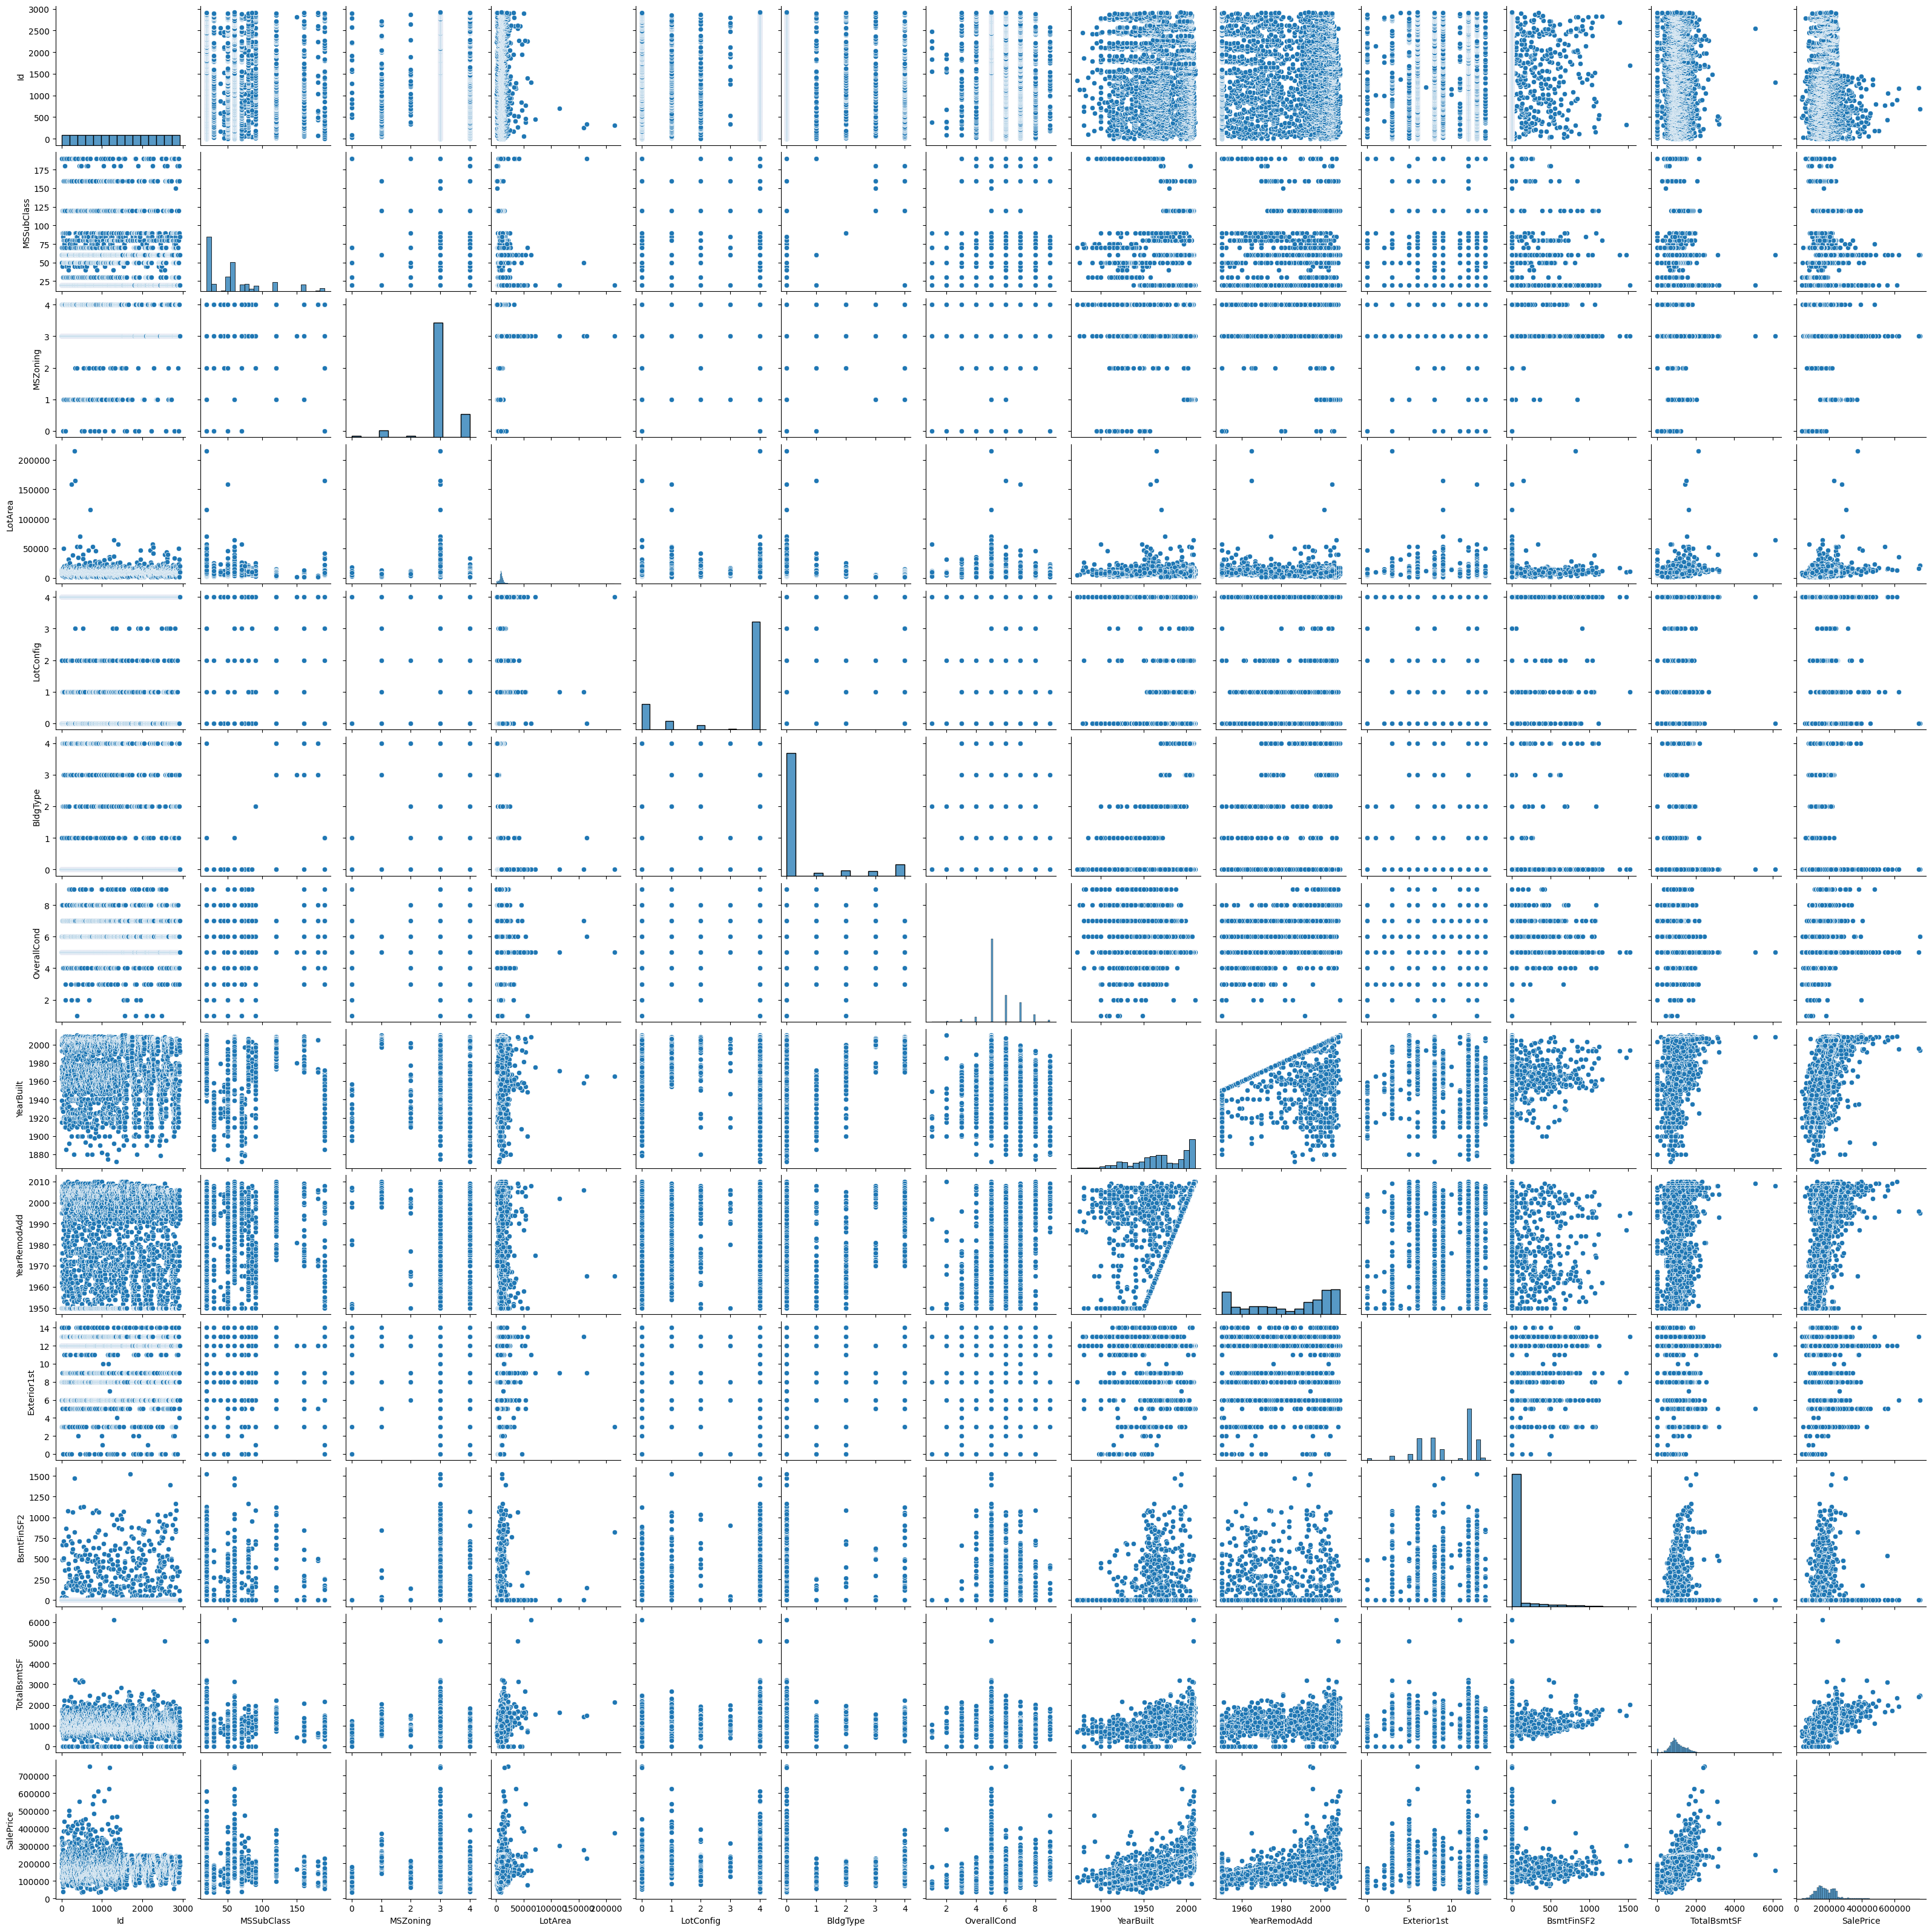

In [79]:
sns.pairplot(data)
plt.show()

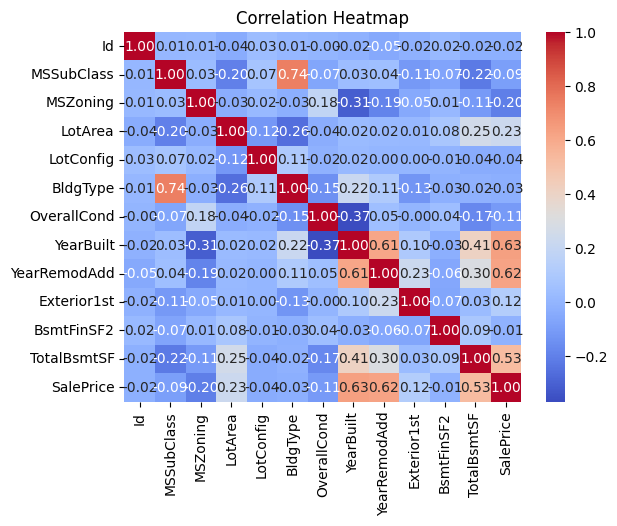

In [87]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Barplot

C:\Users\maniteja\AppData\Local\Temp\ipykernel_5164\2399176695.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LotArea',y='SalePrice', data=data, ci=None)


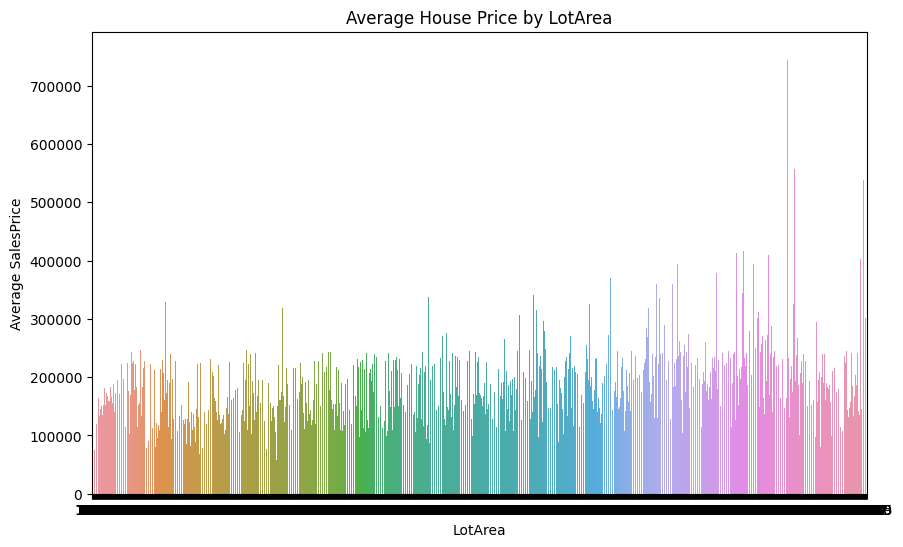

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x='LotArea',y='SalePrice', data=data, ci=None)
plt.title('Average House Price by LotArea')
plt.xlabel('LotArea')
plt.ylabel('Average SalesPrice')
plt.show()

## Data preprocessing for changing categorial values into binary format.

 here we can change all values into binary format we used OrdinalEncoder method for sklearn preprocessing library.


## importing OrdinalEncoder


In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
data['MSZoning'] = data['MSZoning'].replace('C(all)', 'C')
encoder = OrdinalEncoder(categories='auto')
data[['MSZoning']] = encoder.fit_transform(data[['MSZoning']])
data[['LotConfig']] = encoder.fit_transform(data[['LotConfig']])
data[['BldgType']] = encoder.fit_transform(data[['BldgType']])
data[['Exterior1st']] = encoder.fit_transform(data[['Exterior1st']])
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.0
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.0
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.0
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.0
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.0


## check whether missing value.

In [13]:
data.isnull()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,False,False,False,False,False,False,False,False,False,False,False,False,True
2915,False,False,False,False,False,False,False,False,False,False,False,False,True
2916,False,False,False,False,False,False,False,False,False,False,False,False,True
2917,False,False,False,False,False,False,False,False,False,False,False,False,True


## now we want know the count of missing values is House_Predicction dataset.

In [14]:
missing_values=data.isnull().sum()
missing_values

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

## Fill the NULL values in MSZoning.

In [15]:
# Here, First finding the mode of MSZoning values.
# After got the mode value of mszoning, To replace the NULL value into mode value.
a = data["MSZoning"].mode()                               # finding the mode value
data['MSZoning'] = data['MSZoning'].replace({np.nan:3.0}) # Just replaced the NULL value into mode value
(data['MSZoning'].isnull()).value_counts()      

MSZoning
False    2919
Name: count, dtype: int64

## Fill the NULL values in Exterior1st.

In [16]:
mode_value = data["Exterior1st"].mode()
data['Exterior1st'] = data['Exterior1st'].replace({np.nan:12.0})
(data['Exterior1st'].isnull()).value_counts()

Exterior1st
False    2919
Name: count, dtype: int64

## Fill the NULL values in BsmtFinSF2.

In [17]:
mode_value2 = data["BsmtFinSF2"].mean()
data['BsmtFinSF2'] = data['BsmtFinSF2'].replace({np.nan:49.58224811514736})
(data['BsmtFinSF2'].isnull()).value_counts()

BsmtFinSF2
False    2919
Name: count, dtype: int64

## Fill the NULL values in TotalBsmtSF.

In [18]:
mode_value3 = data["TotalBsmtSF"].mean()
data['TotalBsmtSF'] = data['TotalBsmtSF'].replace({np.nan:1051.7775873886224})
(data['TotalBsmtSF'].isnull()).value_counts()


TotalBsmtSF
False    2919
Name: count, dtype: int64

# After completion of filling of NULL value result here.

In [19]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         0
TotalBsmtSF        0
SalePrice       1459
dtype: int64

### finally we fill all null values for increase the accuracy by train the data.

## Here Target feature have huge NULL values.
        To solve using Machine learning algorithm is linear regression. 
        

In [31]:
df_missing = data[data['SalePrice'].isnull()]
df_not_missing = data.dropna()

## split the data into features (x) and target(y)

In [32]:
X_train = df_not_missing[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'Exterior1st']]
y_train = df_not_missing['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

## import LinearRegression.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
max_iter_value=1000

In [36]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
LinearRegression()

LinearRegression()

## Predicted the NULL values in Target feature.

In [38]:
# Predict missing values
X_missing = df_missing[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'Exterior1st']]
predicted_values = model.predict(X_missing)
data.loc[data['SalePrice'].isnull(), 'SalePrice'] = predicted_values
print(data)

        Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0        0          60       3.0     8450        4.0       0.0            5   
1        1          20       3.0     9600        2.0       0.0            8   
2        2          60       3.0    11250        4.0       0.0            5   
3        3          70       3.0     9550        0.0       0.0            5   
4        4          60       3.0    14260        2.0       0.0            5   
...    ...         ...       ...      ...        ...       ...          ...   
2914  2914         160       4.0     1936        4.0       3.0            7   
2915  2915         160       4.0     1894        4.0       4.0            5   
2916  2916          20       3.0    20000        4.0       0.0            7   
2917  2917          85       3.0    10441        4.0       0.0            5   
2918  2918          60       3.0     9627        4.0       0.0            5   

      YearBuilt  YearRemodAdd  Exterior1st  BsmtFin

### replace name data as houseprediction.

In [39]:
houseprediction=data

In [40]:
houseprediction

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.000000
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.000000
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.000000
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.000000
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,4.0,1936,4.0,3.0,7,1970,1970,5.0,0.0,546.0,145872.203849
2915,2915,160,4.0,1894,4.0,4.0,5,1970,1970,5.0,0.0,546.0,145872.203849
2916,2916,20,3.0,20000,4.0,0.0,7,1960,1996,12.0,0.0,1224.0,191509.982124
2917,2917,85,3.0,10441,4.0,0.0,5,1992,1992,6.0,0.0,912.0,203882.190331


### splitinng the dataset.

In [41]:
X = houseprediction[['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF']]
y = houseprediction['SalePrice']

## 2 . Feature selecting using Correlation analysis.

#### import seasborn

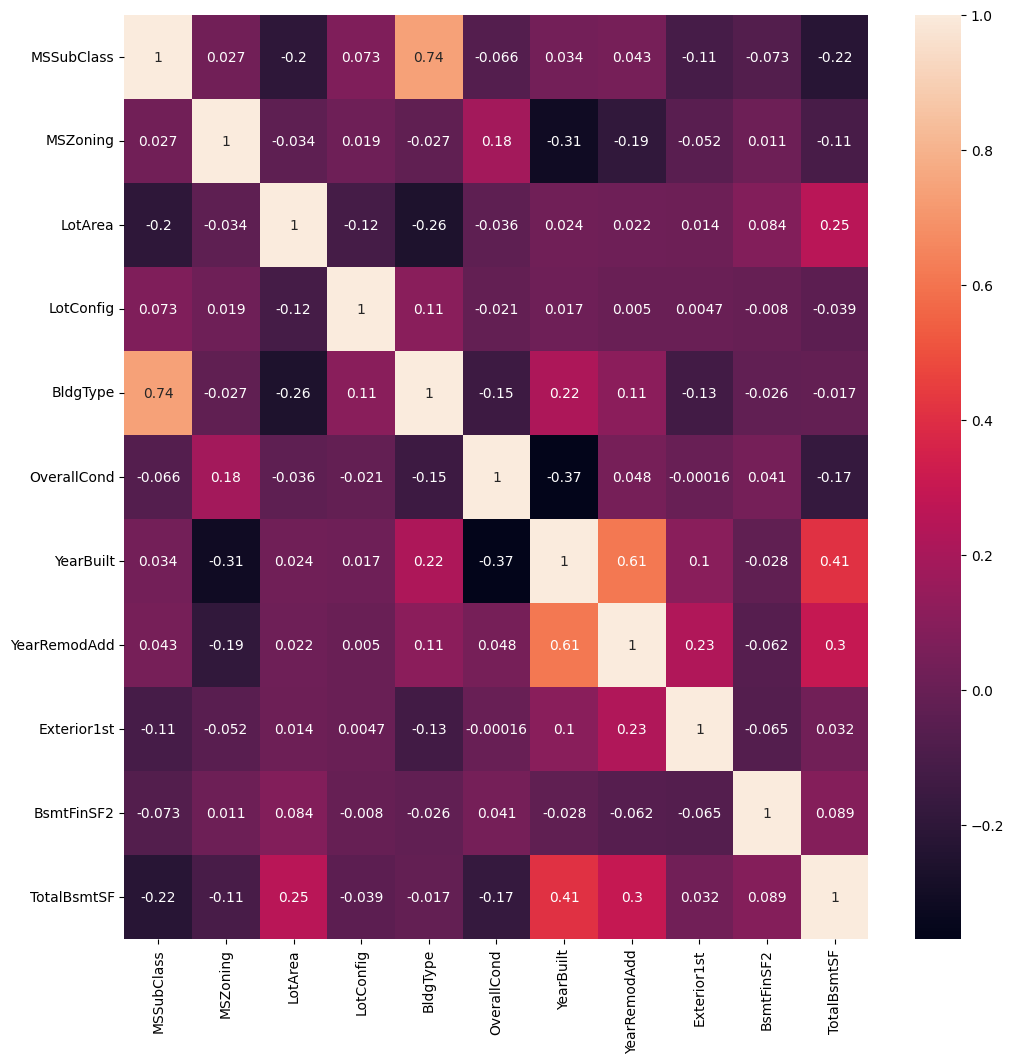

In [42]:
import seaborn as sns
plt.figure(figsize=(12,12))
cor = X.corr(method='pearson')
sns.heatmap(cor,annot=True)
plt.show()

In [43]:
def correlation(data , threshold):
    corr_rel = set()
    C = data.corr()
    for i in range(len(C.columns)):
        for j in range(i):
            if abs(C.iloc[i,j]>threshold):
                col_name=C.columns[i]
                corr_rel.add(col_name)
    return corr_rel

feature = correlation(X , 0.2)
len(set(feature))
print(feature)

{'YearRemodAdd', 'TotalBsmtSF', 'Exterior1st', 'YearBuilt', 'BldgType'}


## Spliting the selected feature for training and testing.

In [56]:
X = houseprediction[['Exterior1st', 'TotalBsmtSF', 'BldgType', 'YearBuilt', 'YearRemodAdd']]
y = houseprediction['SalePrice']
X_train , x_test , Y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

## Building the model.

In [57]:
lr = LinearRegression()
model= lr.fit(X_train , Y_train)

## predicted the value.

In [88]:
y_pred=model.predict(x_test)

In [89]:
y_pred

array([147837.3620505 , 188685.01261487, 173652.17370431, 198732.96678856,
       221824.01725389, 263494.50390191, 102723.95385802, 195001.81049805,
        90473.08033077, 205895.44961221, 172452.62003599, 193407.56360596,
       151533.22296584, 231999.063886  , 178650.53039066, 218289.77018532,
       146673.6057276 , 205623.06946803,  95322.30896136, 139511.70214615,
       219333.53164515,  95275.91743514, 104592.159788  , 216487.43738509,
       202072.80025298, 215276.0852702 , 215706.53056695, 126139.62339777,
       210154.45842303, 140107.80446557, 258996.56000365, 157932.03468895,
       189256.85776784, 202755.71588409, 213208.66232089, 244131.61679979,
       167130.09031019, 153667.34206654, 141656.60655864, 145398.4590435 ,
        95199.64147568, 207574.42685329, 257117.98472899, 167659.29696632,
       174285.72954777, 200683.27875071, 214618.86324109, 183155.2527409 ,
       178224.43700704, 196043.65636346, 114996.08766895, 189471.36570134,
       108772.83825936, 2

## Evalute model performance.

In [69]:
 from sklearn.metrics import mean_squared_error,r2_score 

In [70]:
mse=mean_squared_error(y_test,y_pred)

In [71]:
r2=r2_score(y_test,y_pred)

In [72]:
print(f'mean squared error:{mse}')

mean squared error:1844126160.467445


In [73]:
print(f'R-squared:{r2}')

R-squared:0.5996740361378974
